In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings

filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [8]:
!pip install pyarrow

sales_data = pd.read_feather("Sales_data.ftr")
print("Dataset Shape:", sales_data.shape)
print("Columns:", list(sales_data.columns))

Dataset Shape: (186850, 6)
Columns: ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']


In [9]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [11]:
sales_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [12]:
sales_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [13]:
sales_data.duplicated().sum()

1162

In [14]:
sales_data = sales_data.dropna(how='all')
sales_data = sales_data.drop_duplicates()
sales_data = sales_data[sales_data['Order Date'] != 'Order Date']
print("Final shape:", sales_data.shape)

Final shape: (185686, 6)


In [15]:
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'], errors='coerce')
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'], errors='coerce')

def extract_month(date_str):
    try:
        return int(date_str.split('/')[0])
    except:
        return None

sales_data['Month'] = sales_data['Order Date'].apply(extract_month)
sales_data['Sales_Amount'] = sales_data['Quantity Ordered'] * sales_data['Price Each']
sales_data['City'] = sales_data['Purchase Address'].str.split(',').str.get(1).str.strip()

In [16]:
## Analysis 1: Best Sales Month

In [17]:
monthly_sales = sales_data.groupby('Month')['Sales_Amount'].sum().sort_values(ascending=False)
print(monthly_sales)

Month
12    4608295.70
10    3734777.86
4     3389217.98
11    3197875.05
5     3150616.23
3     2804973.35
7     2646461.32
6     2576280.15
8     2241083.37
2     2200078.08
9     2094465.69
1     1821413.16
Name: Sales_Amount, dtype: float64


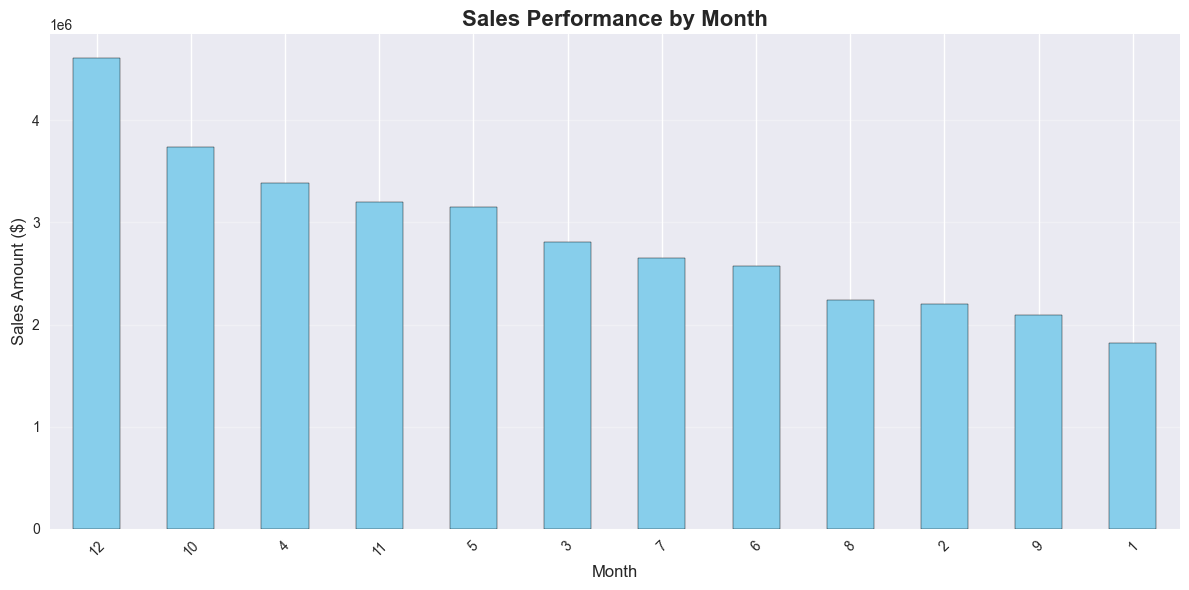

In [18]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sales Performance by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales Amount ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
## Analysis 2: Top Performing Cities

In [20]:
city_orders = sales_data['City'].value_counts()
city_sales = sales_data.groupby('City')['Sales_Amount'].sum().sort_values(ascending=False)

print("Top 10 Cities by Order Count:")
print(city_orders.head(10))

print("\nTop 10 Cities by Sales Amount:")
print(city_sales.head(10))

Top 10 Cities by Order Count:
City
San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Dallas           14797
Seattle          14713
Portland         12449
Austin            9890
Name: count, dtype: int64

Top 10 Cities by Sales Amount:
City
San Francisco    8254743.55
Los Angeles      5448304.28
New York City    4661867.14
Boston           3658627.65
Atlanta          2794199.07
Dallas           2765373.96
Seattle          2745046.02
Portland         2319331.94
Austin           1818044.33
Name: Sales_Amount, dtype: float64


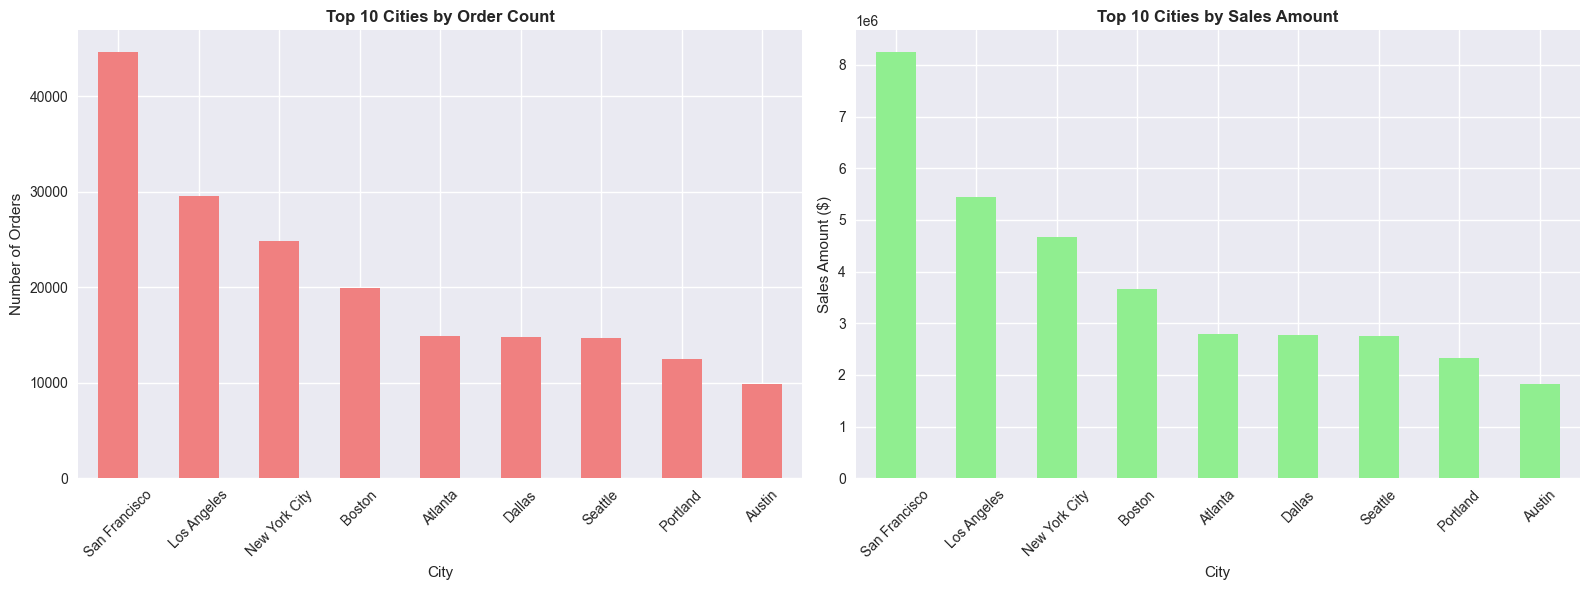

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

city_orders.head(10).plot(kind='bar', ax=ax1, color='lightcoral')
ax1.set_title('Top 10 Cities by Order Count', fontweight='bold')
ax1.set_xlabel('City')
ax1.set_ylabel('Number of Orders')
ax1.tick_params(axis='x', rotation=45)

city_sales.head(10).plot(kind='bar', ax=ax2, color='lightgreen')
ax2.set_title('Top 10 Cities by Sales Amount', fontweight='bold')
ax2.set_xlabel('City')
ax2.set_ylabel('Sales Amount ($)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [22]:
## Analysis 3: Product Performance Analysis

In [23]:
product_analysis = sales_data.groupby('Product').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'mean',
    'Sales_Amount': 'sum'
}).sort_values('Quantity Ordered', ascending=False)

print("Top 10 Products by Quantity Sold:")
print(product_analysis.head(10))

Top 10 Products by Quantity Sold:
                            Quantity Ordered  Price Each  Sales_Amount
Product                                                               
AAA Batteries (4-pack)                 30986        2.99      92648.14
AA Batteries (4-pack)                  27615        3.84     106041.60
USB-C Charging Cable                   23931       11.95     285975.45
Lightning Charging Cable               23169       14.95     346376.55
Wired Headphones                       20524       11.99     246082.76
Apple Airpods Headphones               15637      150.00    2345550.00
Bose SoundSport Headphones             13430       99.99    1342865.70
27in FHD Monitor                        7541      149.99    1131074.59
iPhone                                  6847      700.00    4792900.00
27in 4K Gaming Monitor                  6239      389.99    2433147.61


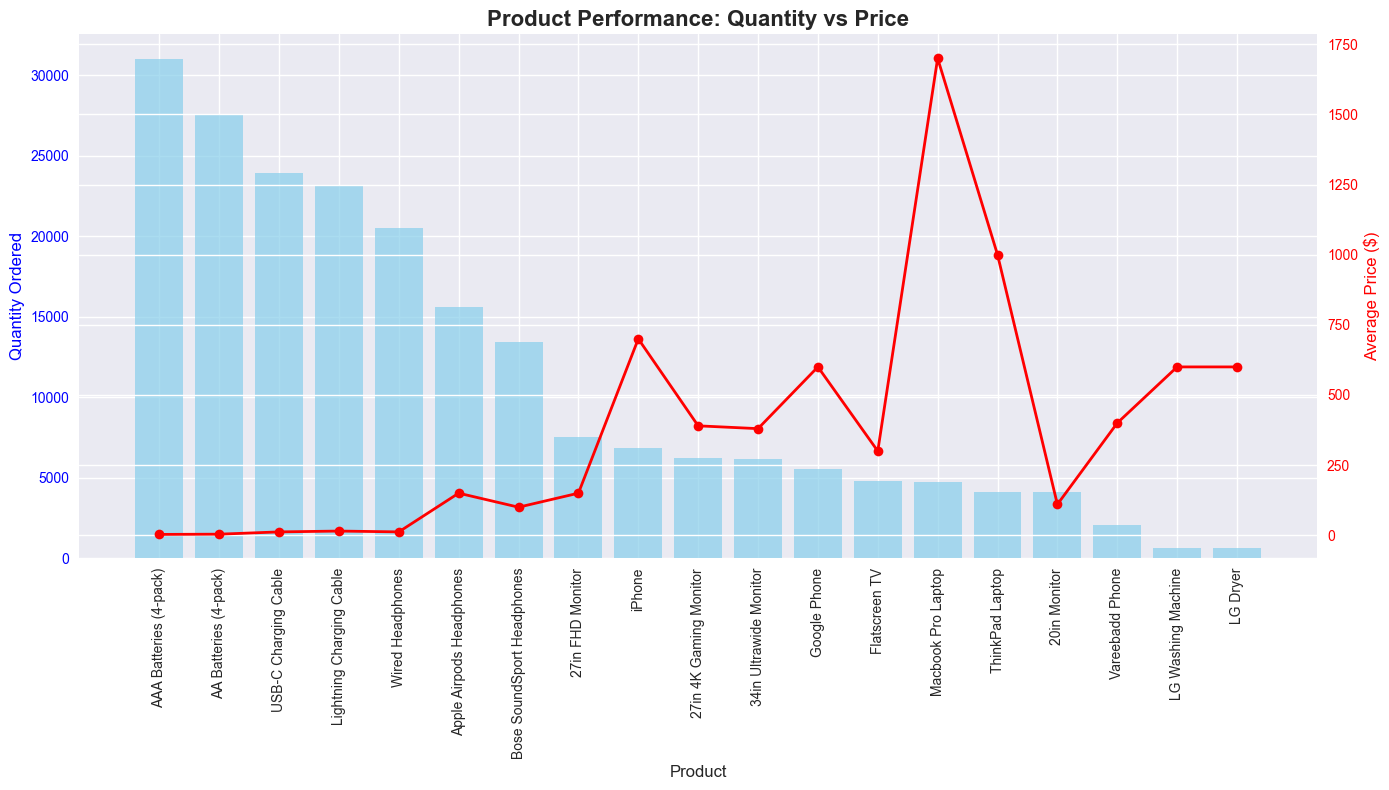

In [24]:
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.bar(product_analysis.index, product_analysis['Quantity Ordered'], 
        color='skyblue', alpha=0.7, label='Quantity Ordered')
ax1.set_xlabel('Product', fontsize=12)
ax1.set_ylabel('Quantity Ordered', color='blue', fontsize=12)
ax1.tick_params(axis='x', rotation=90)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(product_analysis.index, product_analysis['Price Each'], 
         color='red', marker='o', linewidth=2, label='Average Price')
ax2.set_ylabel('Average Price ($)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Product Performance: Quantity vs Price', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [25]:
## Analysis 4: Sales Trends for Top Products

In [26]:
top_5_products = product_analysis.head(5).index
top_products_data = sales_data[sales_data['Product'].isin(top_5_products)]

trend_pivot = top_products_data.groupby(['Month', 'Product']).size().unstack(fill_value=0)
print(trend_pivot)

Product  AA Batteries (4-pack)  AAA Batteries (4-pack)  \
Month                                                    
1                         1037                    1084   
2                         1274                    1320   
3                         1672                    1645   
4                         2062                    1988   
5                         1821                    1888   
6                         1540                    1451   
7                         1555                    1554   
8                         1357                    1340   
9                         1314                    1281   
10                        2240                    2234   
11                        1970                    1999   
12                        2716                    2828   

Product  Lightning Charging Cable  USB-C Charging Cable  Wired Headphones  
Month                                                                      
1                            1069  

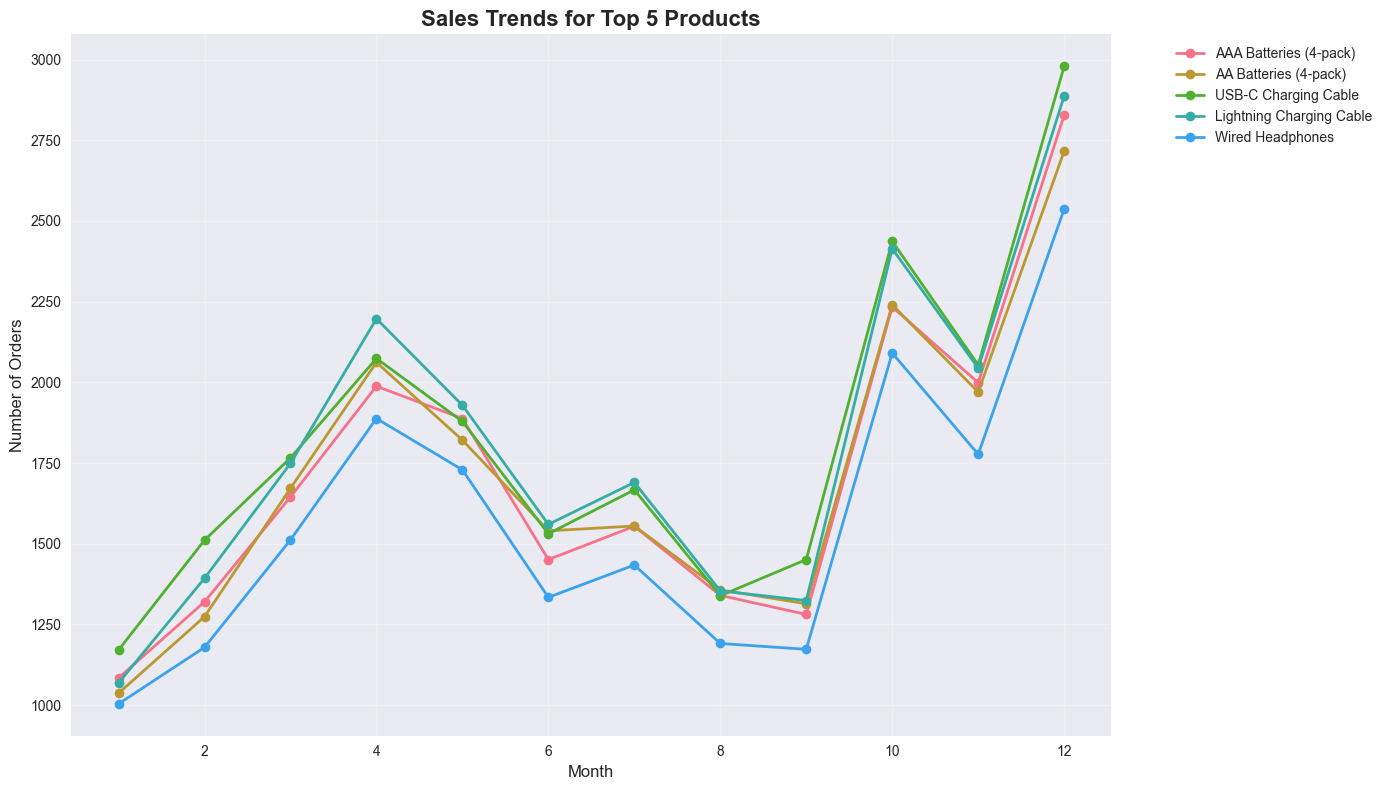

In [27]:
plt.figure(figsize=(14, 8))
for product in top_5_products:
    plt.plot(trend_pivot.index, trend_pivot[product], marker='o', linewidth=2, label=product)

plt.title('Sales Trends for Top 5 Products', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [28]:
## Analysis 5: Market Basket Analysis

In [29]:
multi_product_orders = sales_data[sales_data['Order ID'].duplicated(keep=False)]

product_combinations = multi_product_orders.groupby('Order ID')['Product'].apply(lambda x: ', '.join(sorted(x))).reset_index()
product_combinations.columns = ['Order ID', 'Product Combination']

combination_counts = product_combinations['Product Combination'].value_counts().head(10)
print("Top 10 Product Combinations:")
print(combination_counts)

Top 10 Product Combinations:
Product Combination
Lightning Charging Cable, iPhone                   895
Google Phone, USB-C Charging Cable                 869
Wired Headphones, iPhone                           374
USB-C Charging Cable, Vareebadd Phone              318
Google Phone, Wired Headphones                     311
Apple Airpods Headphones, iPhone                   299
Bose SoundSport Headphones, Google Phone           169
Vareebadd Phone, Wired Headphones                  110
AA Batteries (4-pack), Lightning Charging Cable    103
Lightning Charging Cable, USB-C Charging Cable      96
Name: count, dtype: int64


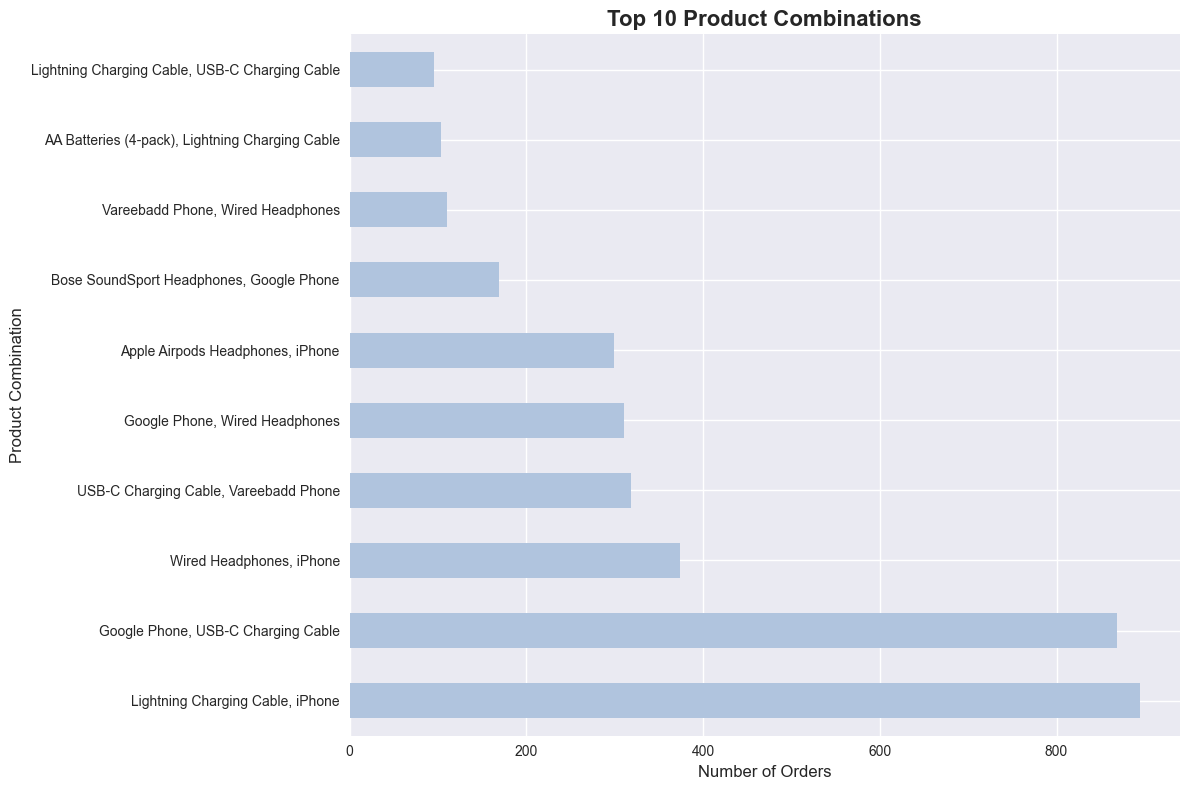

In [30]:
plt.figure(figsize=(12, 8))
combination_counts.plot(kind='barh', color='lightsteelblue')
plt.title('Top 10 Product Combinations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Product Combination', fontsize=12)
plt.tight_layout()
plt.show()

In [1]:
# Insights:
# December is the best sales month with highest revenue
# New York, Los Angeles, and San Francisco are top-performing cities
# AAA Batteries is the best-selling product with highest quantity
# Cheaper products tend to sell more units (price-quantity correlation)
# Sales peak in October, November, and December for most products
# iPhone + Charging Cable is the most common product combination
# Geographic concentration in major metropolitan areas
# Seasonal trends show clear Q4 performance boost

# Recommendations:
# Increase inventory and marketing budget for December
# Focus expansion efforts in New York, Los Angeles, San Francisco
# Implement dynamic pricing for high-volume, low-price items
# Bundle iPhone with Charging Cable for cross-selling
# Pre-stock inventory for October-November-December period
# Replicate successful strategies in similar metropolitan areas
# Reduce stockouts during peak season
# Create product bundling strategies for complementary items